In [3]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [4]:
labels = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")

In [5]:
labels

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [6]:
train_dir = '/kaggle/input/histopathologic-cancer-detection/train'

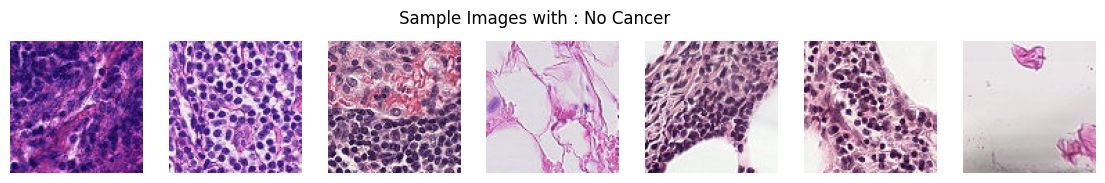

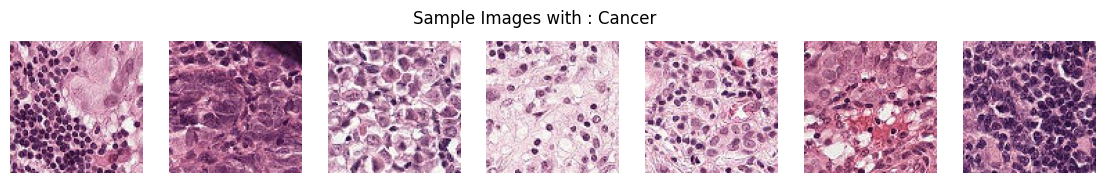

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def show_samples(label, num_samples=7):
    # Mapping from numeric labels to descriptive strings
    label_mapping = {0: 'No Cancer', 1: 'Cancer'}
    label_name = label_mapping.get(label, 'Unknown')  # Get the descriptive label name

    # Get a random sample of images with the specified label
    sample_images = labels[labels['label'] == label].sample(num_samples)
    plt.figure(figsize=(14, 2))
    
    for i, img_name in enumerate(sample_images['id']):
        img_path = os.path.join(train_dir, img_name + '.tif')  # Construct the image path
        img = Image.open(img_path)  # Open the image
        plt.subplot(1, num_samples, i + 1)  
        plt.imshow(img) 
        plt.axis('off')  
        
    plt.suptitle(f'Sample Images with : {label_name}') 
    plt.show()


show_samples(label=0)  # Show samples for 'No Cancer'
show_samples(label=1)  # Show samples for 'Cancer'


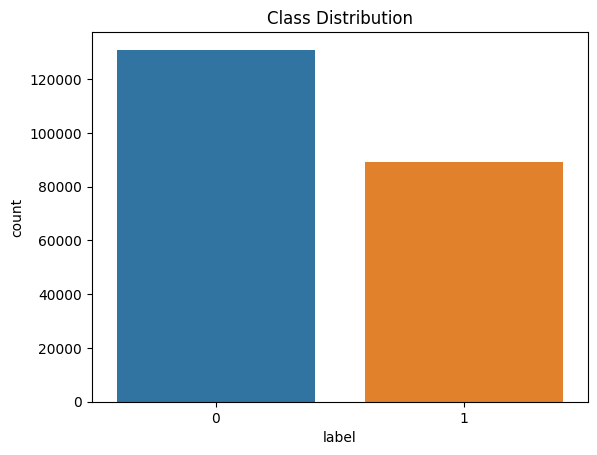

In [8]:
sns.countplot(x='label', data=labels)
plt.title('Class Distribution')
plt.show()

In [9]:
labels.isnull().sum()

id       0
label    0
dtype: int64

In [10]:
num_train_images = len(os.listdir(train_dir))

print(f'{num_train_images} pictures in train.')


220025 pictures in train.


In [11]:
countzero = 0
countone = 0

for i in range(220025):
    if labels['label'][i] == 1:
        countone += 1
    else:
        countzero += 1

In [12]:
print(countone,countzero)

89117 130908


In [13]:
test_dir = "/kaggle/input/histopathologic-cancer-detection/test"

In [14]:
labels

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [30]:
def create_baseline_model():
    model = Sequential([
        Input(shape=(96, 96, 3)),  
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

baseline_model = create_baseline_model()
baseline_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,984,577 (15.20 MB)

 Trainable params: 3,984,577 (15.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:

subset_0 = labels[labels['label'] == 0].sample(frac=0.01, random_state=17)
subset_1 = labels[labels['label'] == 1].sample(frac=0.01, random_state=17)

train_0, val_0 = train_test_split(subset_0, test_size=0.2, random_state=17)
train_1, val_1 = train_test_split(subset_1, test_size=0.2, random_state=17)

train_labels = pd.concat([train_0, train_1]).sample(frac=1, random_state=17)  # Shuffle to mix labels
val_labels = pd.concat([val_0, val_1]).sample(frac=1, random_state=17)


train_labels['label'] = train_labels['label'].astype(str)
val_labels['label'] = val_labels['label'].astype(str)


train_labels['filename'] = train_labels['id'] + '.tif'
val_labels['filename'] = val_labels['id'] + '.tif'

In [33]:
train_labels['label'].value_counts()

label
0    1047
1     712
Name: count, dtype: int64

In [34]:
print(train_labels)

                                              id label  \
69117   53256865fa9b3737c95a204146e952467fd515cd     1   
143269  6e4d5617f272113db41089142701f9e4343e1507     0   
35105   33545615db552bb5463c4a0dcf6af36e201a7823     1   
15732   a01a193a44499f5e358200f587796cebf1c09216     1   
75053   f3ac928c7a95e3ea04826c6d39af23b3b956ace3     0   
...                                          ...   ...   
181866  1b32d301760e8a6a3eba0814864552eabac52cb8     1   
41102   1154d1696e1dbd7a26aa45a8e0de7ba11ca4ae59     1   
153783  52d7e931286d3f7e1b62895a93e78f7146493c58     0   
213271  6fbb3e5edbb6e42d4d1c4f7f6e90d543bf79de9c     1   
149844  06a92cb1558d4145bd57d70941268c8fca7d5997     1   

                                            filename  
69117   53256865fa9b3737c95a204146e952467fd515cd.tif  
143269  6e4d5617f272113db41089142701f9e4343e1507.tif  
35105   33545615db552bb5463c4a0dcf6af36e201a7823.tif  
15732   a01a193a44499f5e358200f587796cebf1c09216.tif  
75053   f3ac928c7a95e3ea0482

In [18]:
print(val_labels)

                                              id label  \
10331   2779c4e06fbe2bd26bae8c1ef1d2a759ee0e829a     0   
64246   360fe0c1bad0a44a2a5ab976c2832c0a615fb90c     1   
34998   ff783c17dd941c3a4a53e89251f43a05b6718eca     0   
206683  8b0bbc0470d00e18984886c83300930116dbf0f0     1   
26496   ab9bd7b1661fbb024640c2b0a61b18b1cdf90f33     1   
...                                          ...   ...   
36137   69038cf8e11bf5f8a0aedb15609a4efbe1b50a84     0   
8419    5e40bc0f11ea0a89ab14f154655b6c9004ba00a5     1   
147575  e8670bf56fbd27320a9d00f9c3d130cb89bee215     1   
171291  2595cf4edcd83e17080e62c680266963a1b74d7f     1   
193743  9419a8ca3487f9fa90aedeec98834430dffde2a8     0   

                                            filename  
10331   2779c4e06fbe2bd26bae8c1ef1d2a759ee0e829a.tif  
64246   360fe0c1bad0a44a2a5ab976c2832c0a615fb90c.tif  
34998   ff783c17dd941c3a4a53e89251f43a05b6718eca.tif  
206683  8b0bbc0470d00e18984886c83300930116dbf0f0.tif  
26496   ab9bd7b1661fbb024640

In [19]:

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True  # Randomly flip images vertically
)
val_datagen = ImageDataGenerator(rescale=1./255)  

# Flow images from dataframe for training and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_labels,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)

Found 1759 validated image filenames belonging to 2 classes.
Found 441 validated image filenames belonging to 2 classes.


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.6131 - loss: 0.6606 - val_accuracy: 0.7007 - val_loss: 0.5765
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.7032 - loss: 0.5803 - val_accuracy: 0.6780 - val_loss: 0.5831
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.7521 - loss: 0.5426 - val_accuracy: 0.7959 - val_loss: 0.4986
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.7701 - loss: 0.4971 - val_accuracy: 0.7846 - val_loss: 0.4878
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.7796 - loss: 0.5004 - val_accuracy: 0.8027 - val_loss: 0.4718


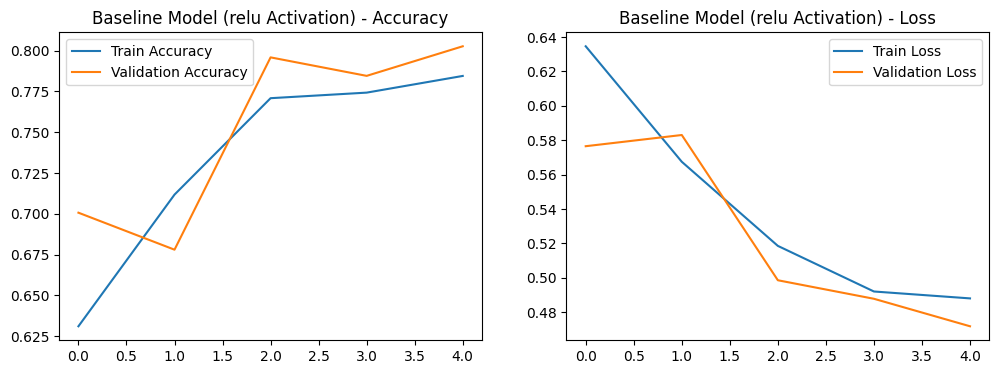

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.5633 - loss: 0.8502 - val_accuracy: 0.6848 - val_loss: 0.5867
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.7036 - loss: 0.5913 - val_accuracy: 0.7166 - val_loss: 0.5777
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 259ms/step - accuracy: 0.7523 - loss: 0.5247 - val_accuracy: 0.7415 - val_loss: 0.5267
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - accuracy: 0.7419 - loss: 0.5282 - val_accuracy: 0.7914 - val_loss: 0.4905
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.7560 - loss: 0.5266 - val_accuracy: 0.7098 - val_loss: 0.5476


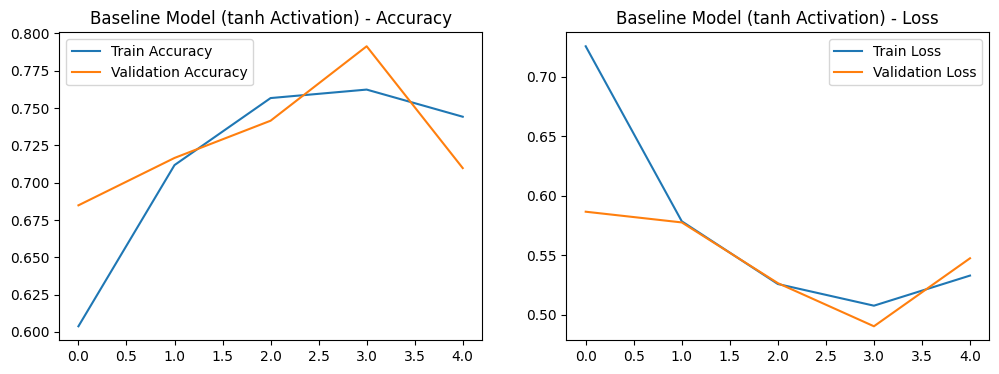

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.5531 - loss: 0.7881 - val_accuracy: 0.5941 - val_loss: 0.6762
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step - accuracy: 0.6133 - loss: 0.6675 - val_accuracy: 0.5941 - val_loss: 0.6754
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 259ms/step - accuracy: 0.5787 - loss: 0.6818 - val_accuracy: 0.5941 - val_loss: 0.6760
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 261ms/step - accuracy: 0.6192 - loss: 0.6645 - val_accuracy: 0.5941 - val_loss: 0.6754
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.5971 - loss: 0.6741 - val_accuracy: 0.5941 - val_loss: 0.6753


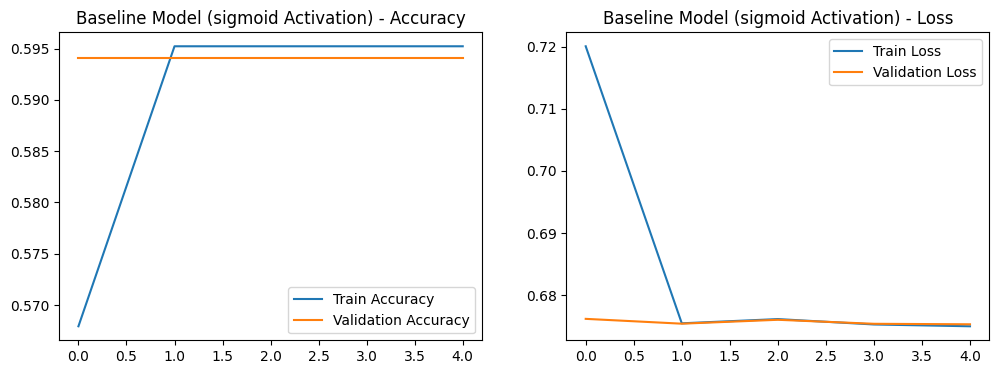

In [27]:
def create_baseline_model(activation_fn):
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3,3), activation=activation_fn),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation=activation_fn),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation=activation_fn),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_baseline_model(activation_fn, train_gen, val_gen, epochs):
    model = create_baseline_model(activation_fn)
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )
    return history

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

with tf.device('/GPU:0'):
    for activation in ['relu', 'tanh', 'sigmoid']:
        history = train_baseline_model(activation, train_generator, val_generator, epochs=5)
        plot_history(history, f'Baseline Model ({activation} Activation)')


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.5309 - loss: 11.3229 - val_accuracy: 0.5941 - val_loss: 0.6902
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 238ms/step - accuracy: 0.6010 - loss: 0.6758 - val_accuracy: 0.5941 - val_loss: 0.6678
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.6056 - loss: 0.6478 - val_accuracy: 0.5941 - val_loss: 0.6277
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.6012 - loss: 0.6334 - val_accuracy: 0.5918 - val_loss: 0.6723
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.5907 - loss: 0.6490 - val_accuracy: 0.6077 - val_loss: 0.6212


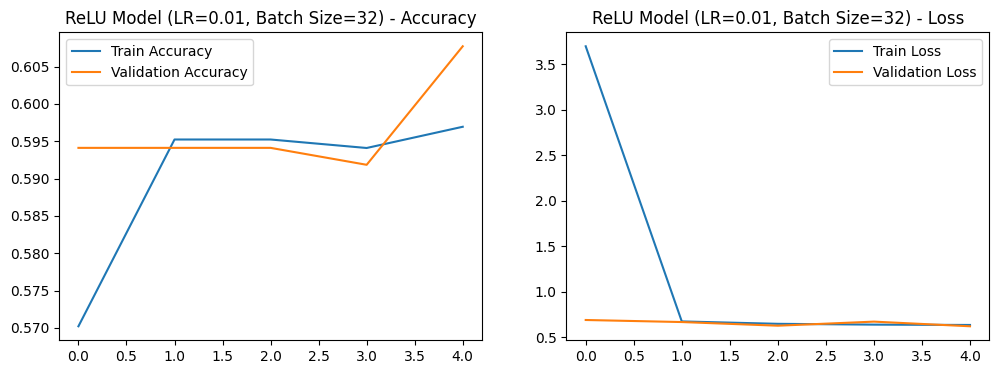

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.5428 - loss: 8.8428 - val_accuracy: 0.5941 - val_loss: 0.6696
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.5877 - loss: 0.6717 - val_accuracy: 0.5941 - val_loss: 0.6536
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.5858 - loss: 0.6525 - val_accuracy: 0.5238 - val_loss: 0.6240
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.5562 - loss: 0.6406 - val_accuracy: 0.5941 - val_loss: 0.6300
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.5863 - loss: 0.6256 - val_accuracy: 0.6213 - val_loss: 0.6095


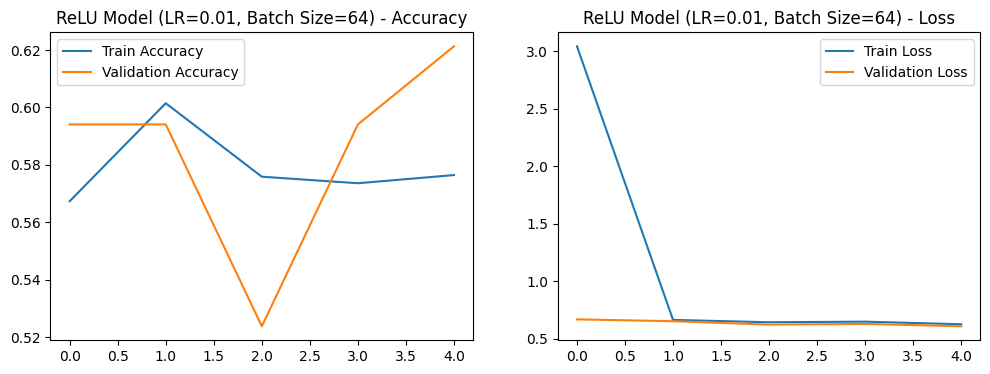

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.5764 - loss: 0.8354 - val_accuracy: 0.5941 - val_loss: 0.5965
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 238ms/step - accuracy: 0.6579 - loss: 0.5969 - val_accuracy: 0.7234 - val_loss: 0.5746
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.7320 - loss: 0.5922 - val_accuracy: 0.5850 - val_loss: 0.6647
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.6137 - loss: 0.6191 - val_accuracy: 0.6281 - val_loss: 0.6186
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 230ms/step - accuracy: 0.6288 - loss: 0.6073 - val_accuracy: 0.4966 - val_loss: 0.6795


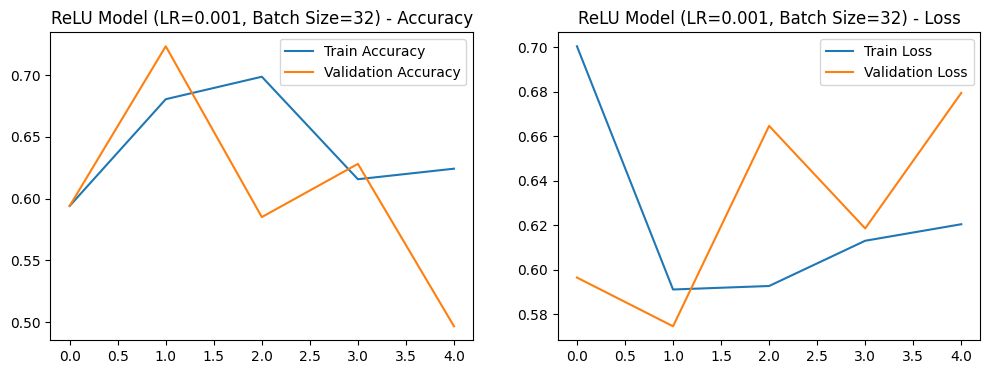

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.5553 - loss: 0.9252 - val_accuracy: 0.5918 - val_loss: 0.6211
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.6183 - loss: 0.5988 - val_accuracy: 0.6440 - val_loss: 0.6445
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.6532 - loss: 0.6029 - val_accuracy: 0.6780 - val_loss: 0.5729
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.7318 - loss: 0.5398 - val_accuracy: 0.7211 - val_loss: 0.5605
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.7466 - loss: 0.5182 - val_accuracy: 0.8027 - val_loss: 0.4836


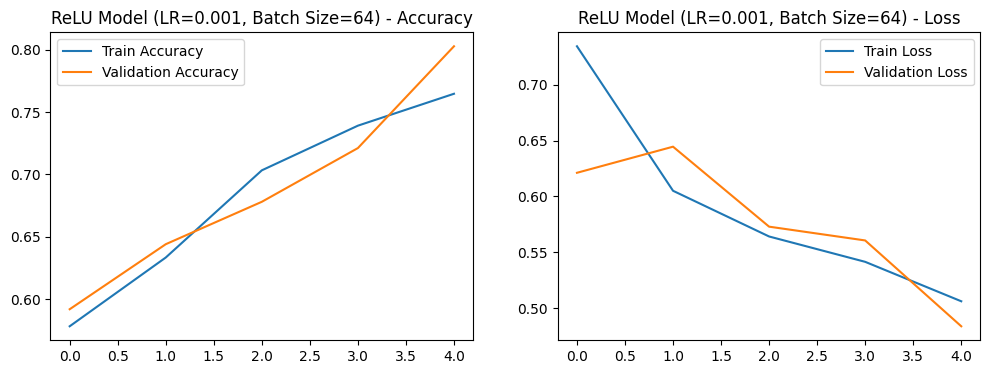

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.5812 - loss: 0.6857 - val_accuracy: 0.7143 - val_loss: 0.5827
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.6937 - loss: 0.5823 - val_accuracy: 0.6712 - val_loss: 0.5506
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.7571 - loss: 0.5188 - val_accuracy: 0.7619 - val_loss: 0.5130
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.7738 - loss: 0.4915 - val_accuracy: 0.7914 - val_loss: 0.4775
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.7703 - loss: 0.5017 - val_accuracy: 0.7959 - val_loss: 0.4709


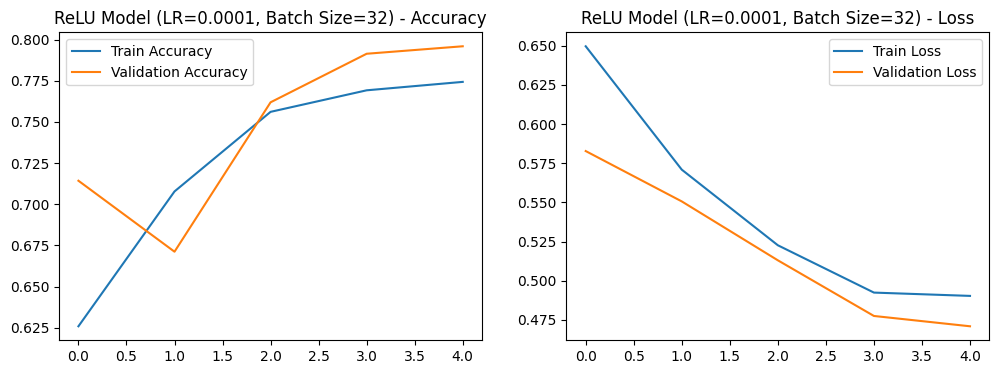

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.5620 - loss: 0.7027 - val_accuracy: 0.5420 - val_loss: 0.6778
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.6614 - loss: 0.6141 - val_accuracy: 0.7007 - val_loss: 0.5529
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 242ms/step - accuracy: 0.7455 - loss: 0.5180 - val_accuracy: 0.7324 - val_loss: 0.5435
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.7612 - loss: 0.5128 - val_accuracy: 0.7982 - val_loss: 0.4819
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - accuracy: 0.7845 - loss: 0.4757 - val_accuracy: 0.8073 - val_loss: 0.4777


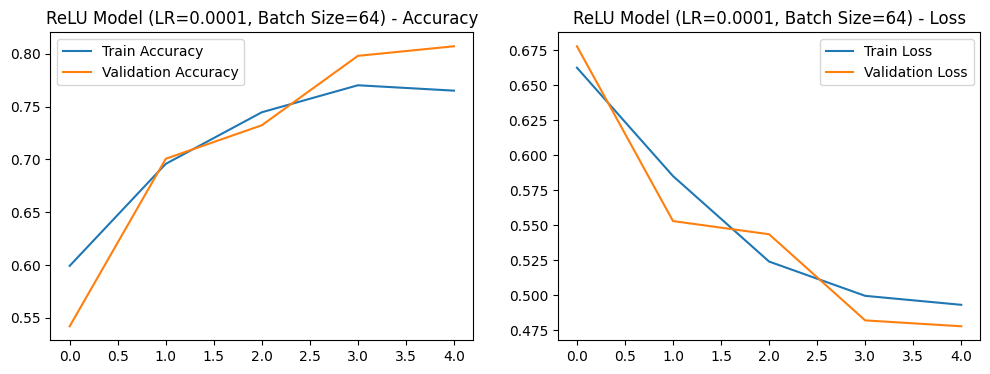

In [29]:
def create_baseline_model():
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_model(learning_rate, batch_size, train_gen, val_gen, epochs=10):
    model = create_baseline_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        batch_size=batch_size
    )
    return history

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64]

with tf.device('/GPU:0'):
    for lr in learning_rates:
        for bs in batch_sizes:
            history = train_model(lr, bs, train_generator, val_generator, epochs=5)
            plot_history(history, f'ReLU Model (LR={lr}, Batch Size={bs})')
